In [2]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import importlib

from trial import Trial
from util import dist
from constants import COND_LABELS, FS
import plots
import analysis_helper

importlib.reload(plots)
importlib.reload(analysis_helper)

sns.set_style('dark', {'axes.grid' : False})
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.rcParams["axes.grid"] = False

### Load data and prepare output directory

In [3]:
DROP_IDS = ["20210526-0913-9mipgl"]
df_trials = pd.read_pickle('../data/df_trials_v2.pickle')
for mid in DROP_IDS:
    df_trials = df_trials.drop(df_trials[df_trials.match_id == mid].index)

In [5]:
pd.crosstab(df_trials.cond_count, df_trials.end_type)

end_type    overfilled  success  target_miss  time_expired
cond_count                                                
C                   34       86            0             0
G                   25       92            1             2

<AxesSubplot:xlabel='cond_count', ylabel='Count'>

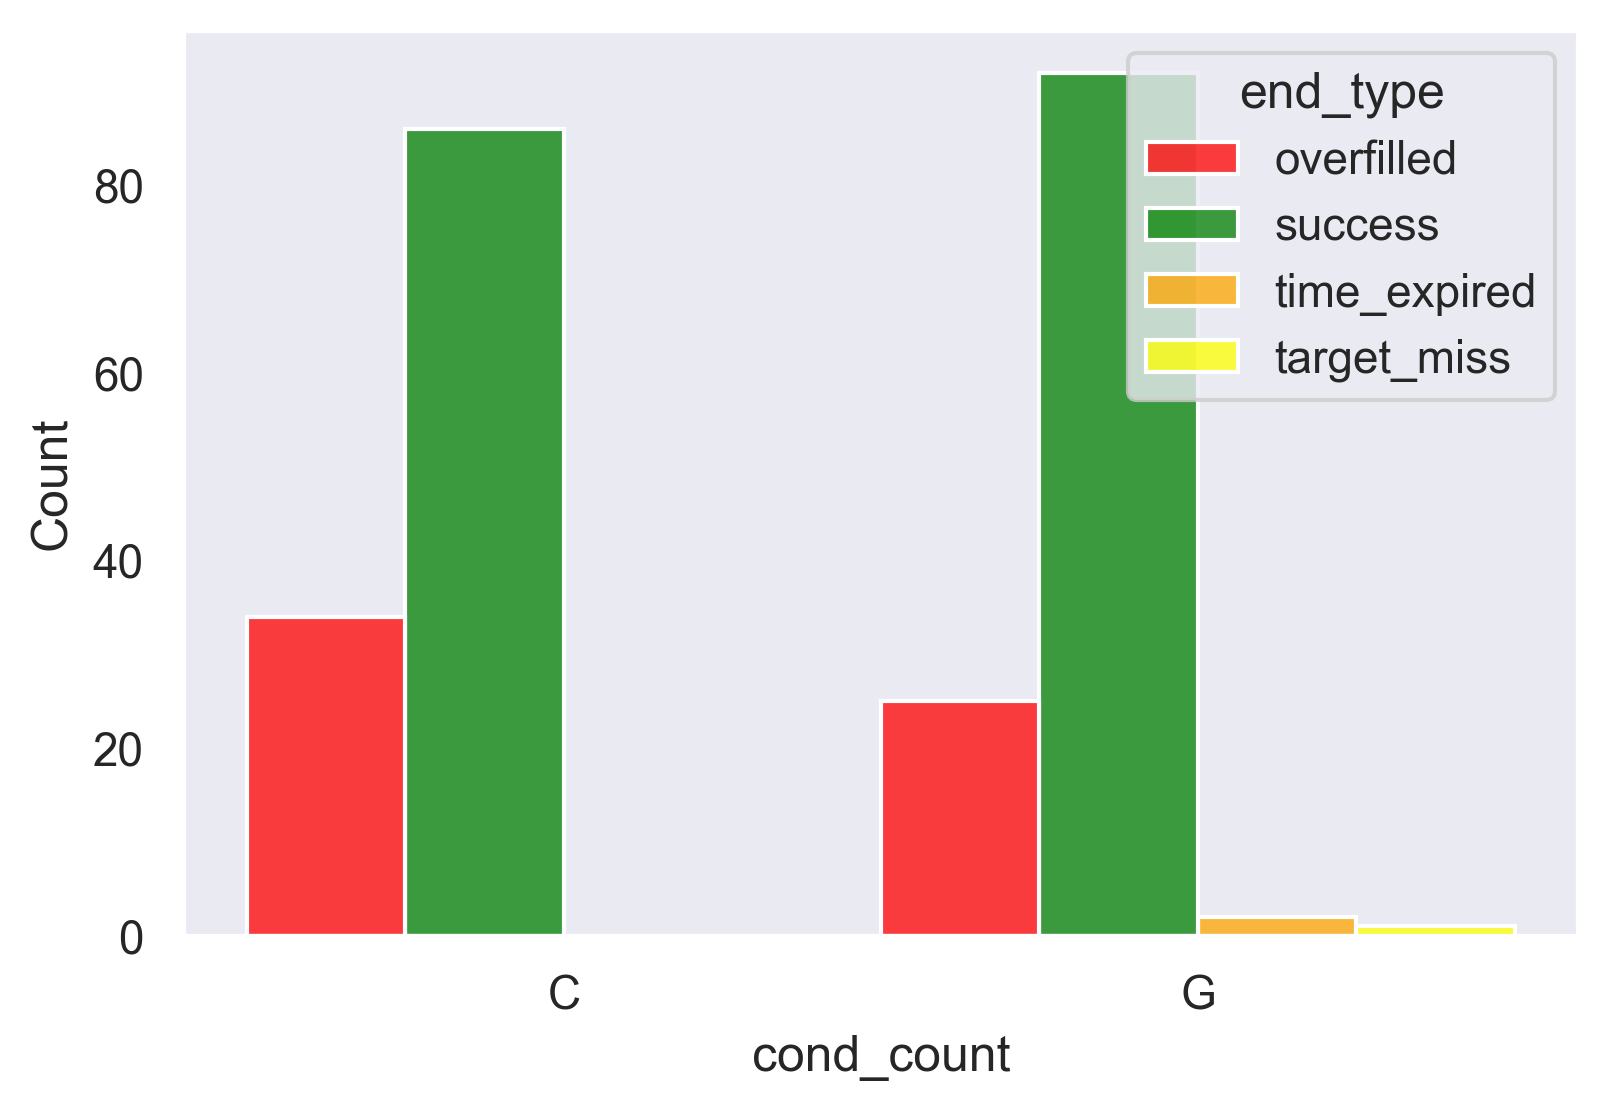

In [13]:
sns.histplot(data=df_trials, hue='end_type', x='cond_count', multiple='dodge', palette=['red', 'green', 'orange', 'yellow'])

In [6]:
pd.crosstab(df_trials.cond_count, df_trials.successful)

successful  0.0  1.0
cond_count          
C            34   86
G            27   93

In [3]:
for mid in df_trials.match_id.unique():
    Path("./out/%s" % mid).mkdir(parents=True, exist_ok=True)

### Duration and success  

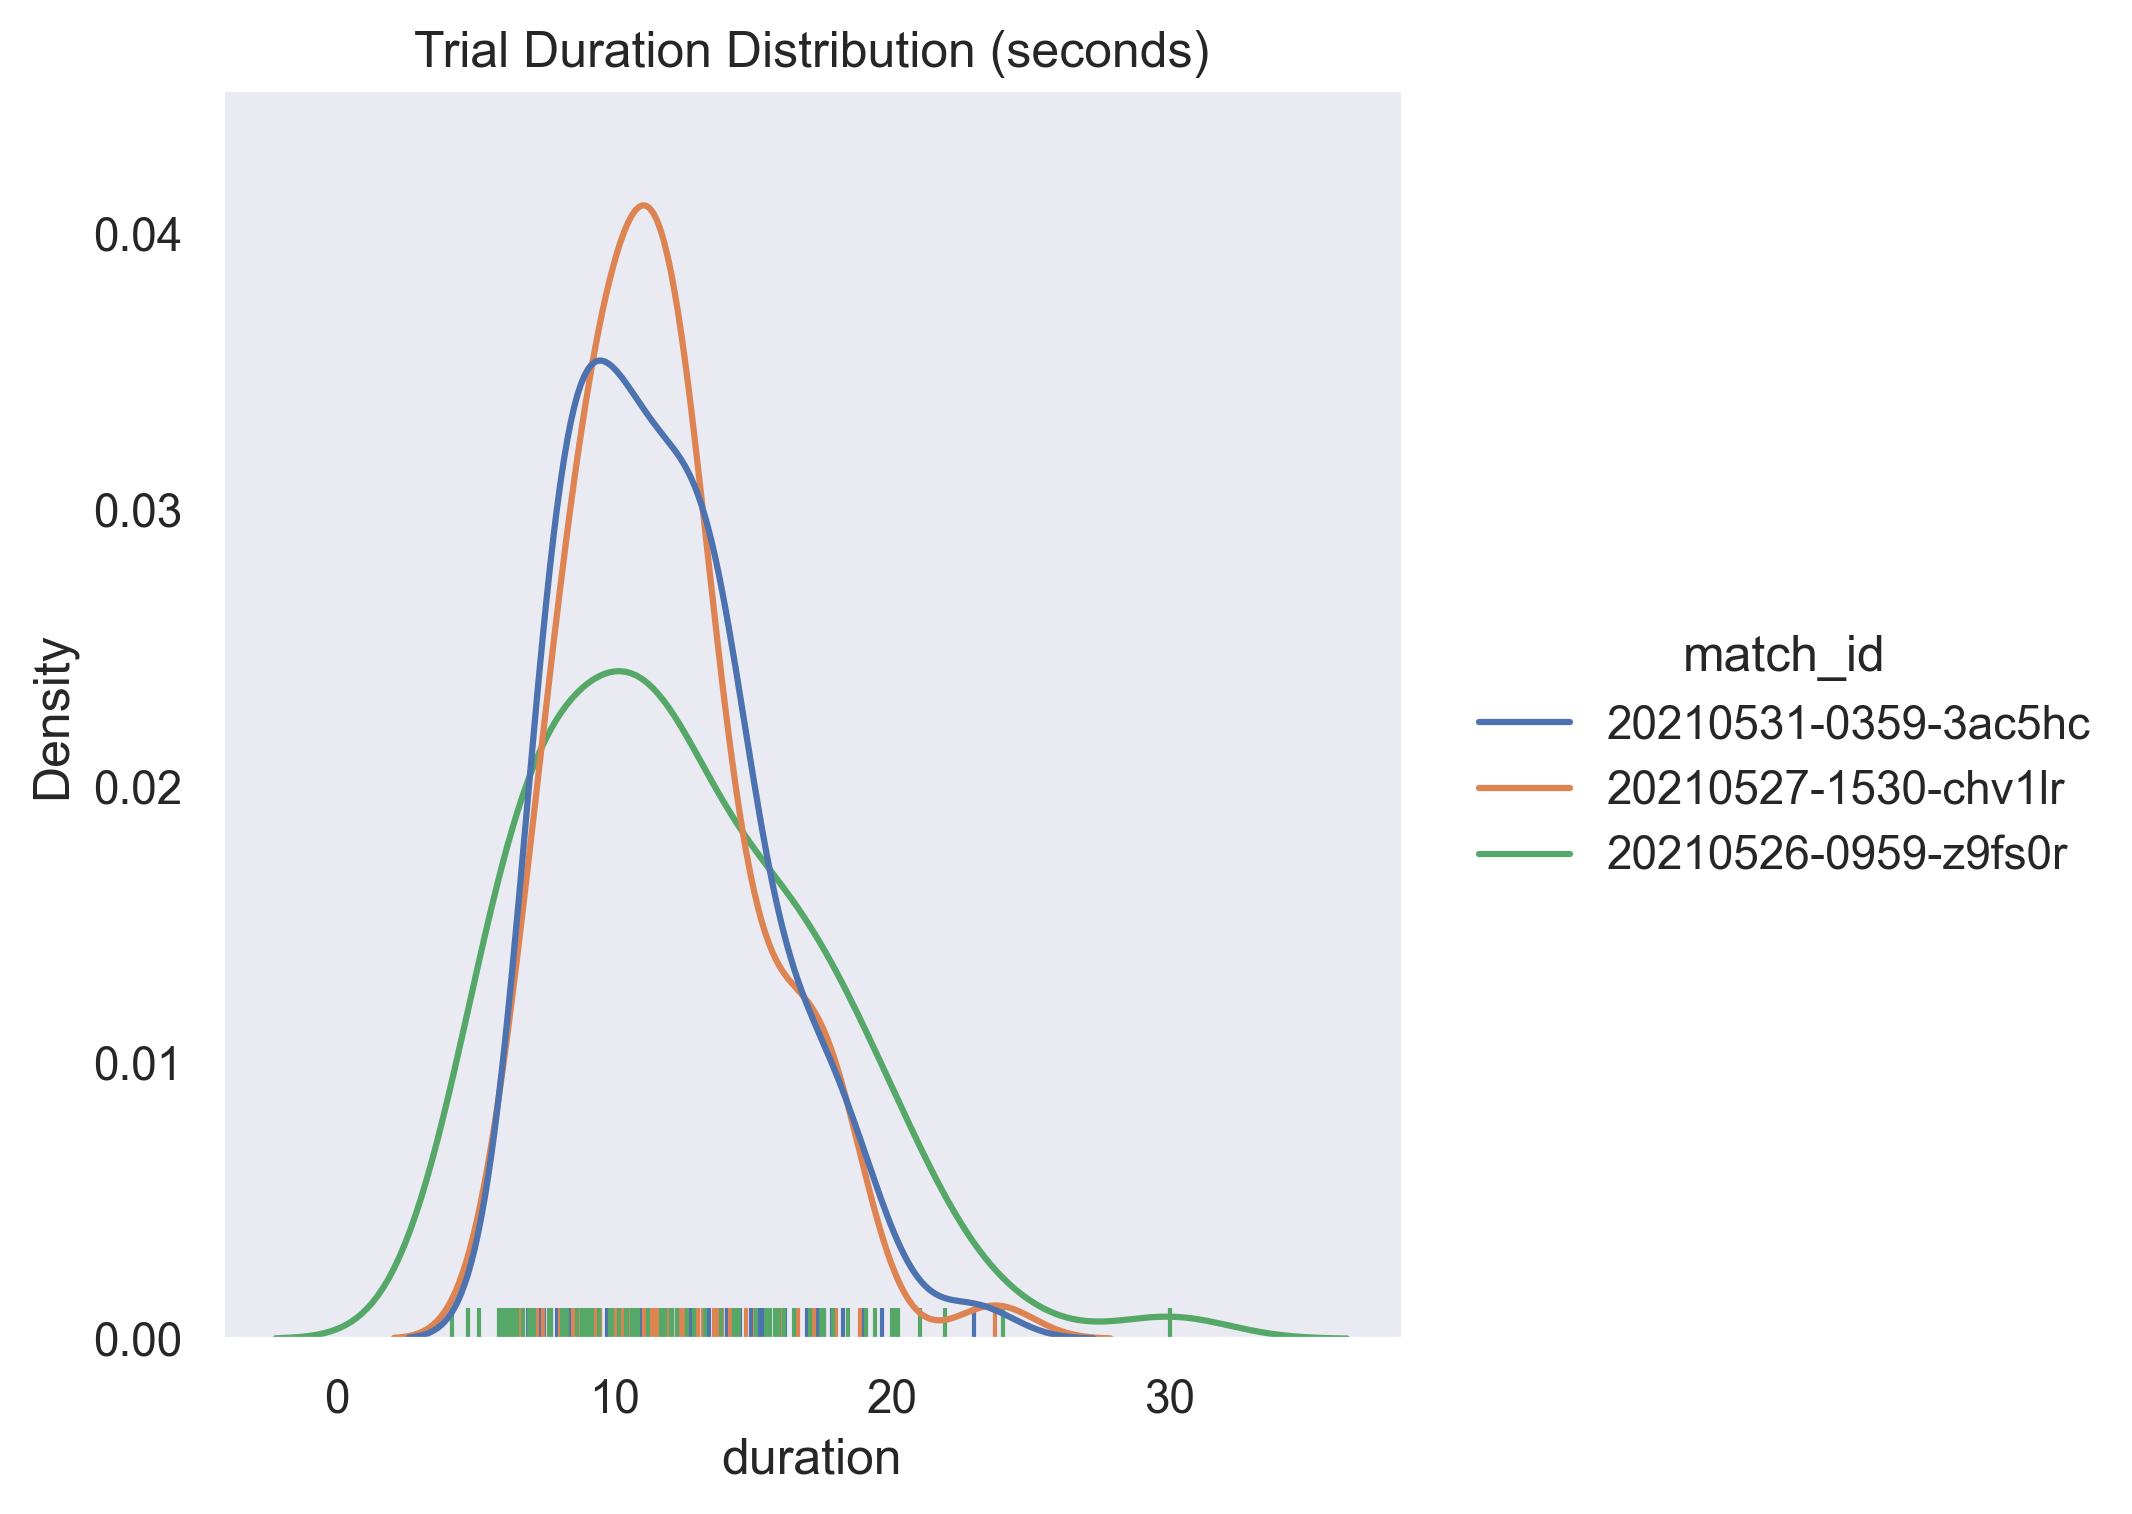

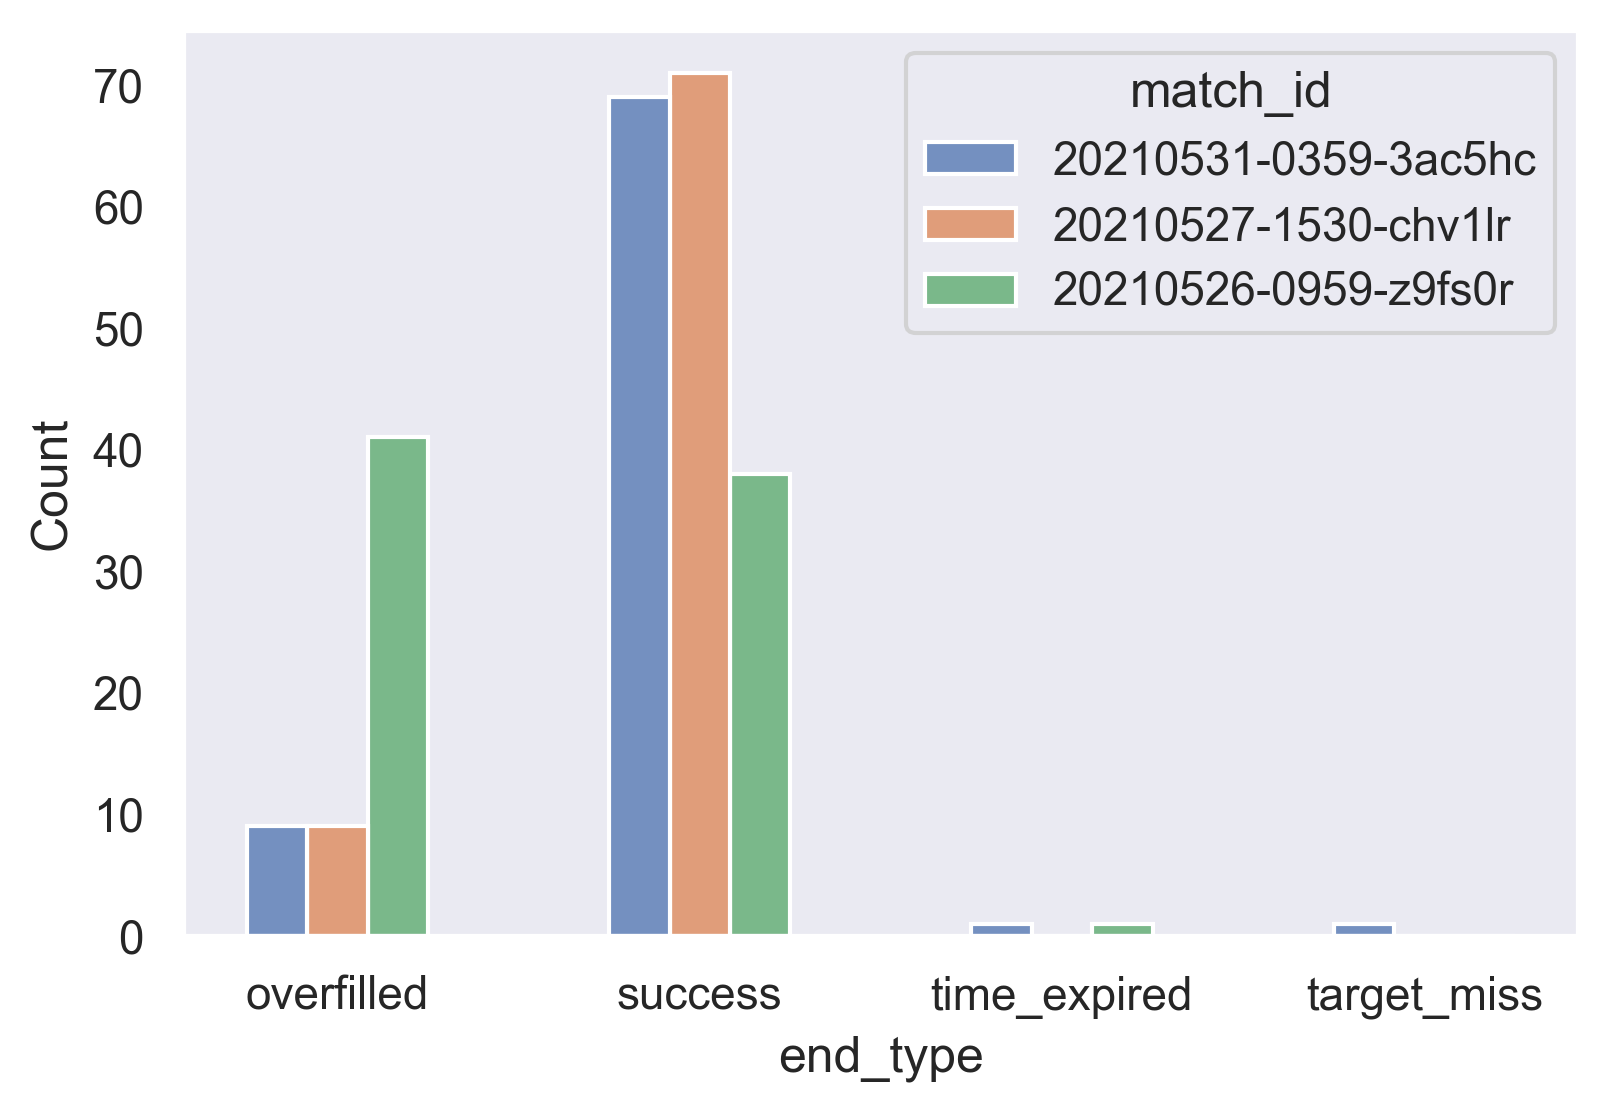

In [4]:
plots.trial_duration(df_trials)
plots.trial_success(df_trials)

### Map color distribution vs spatial occupancy

#### Strong spatial preferences can be seen in all dyads.



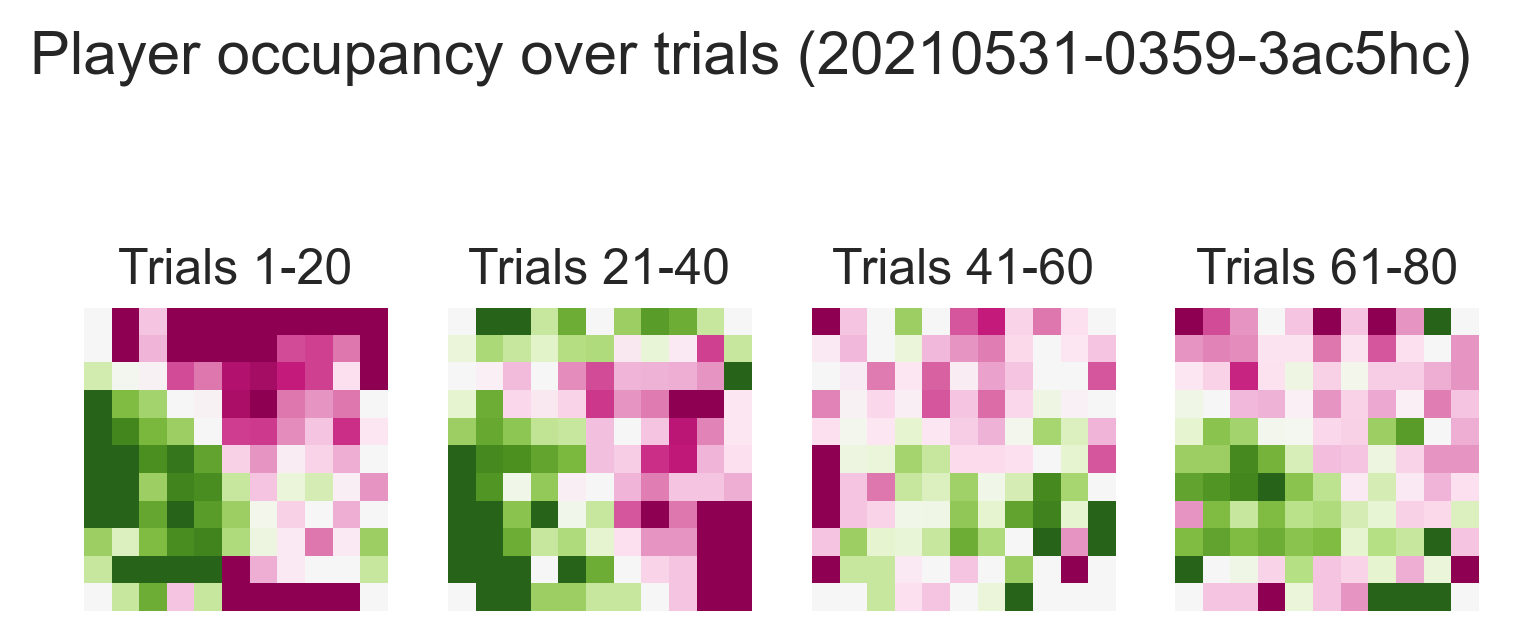

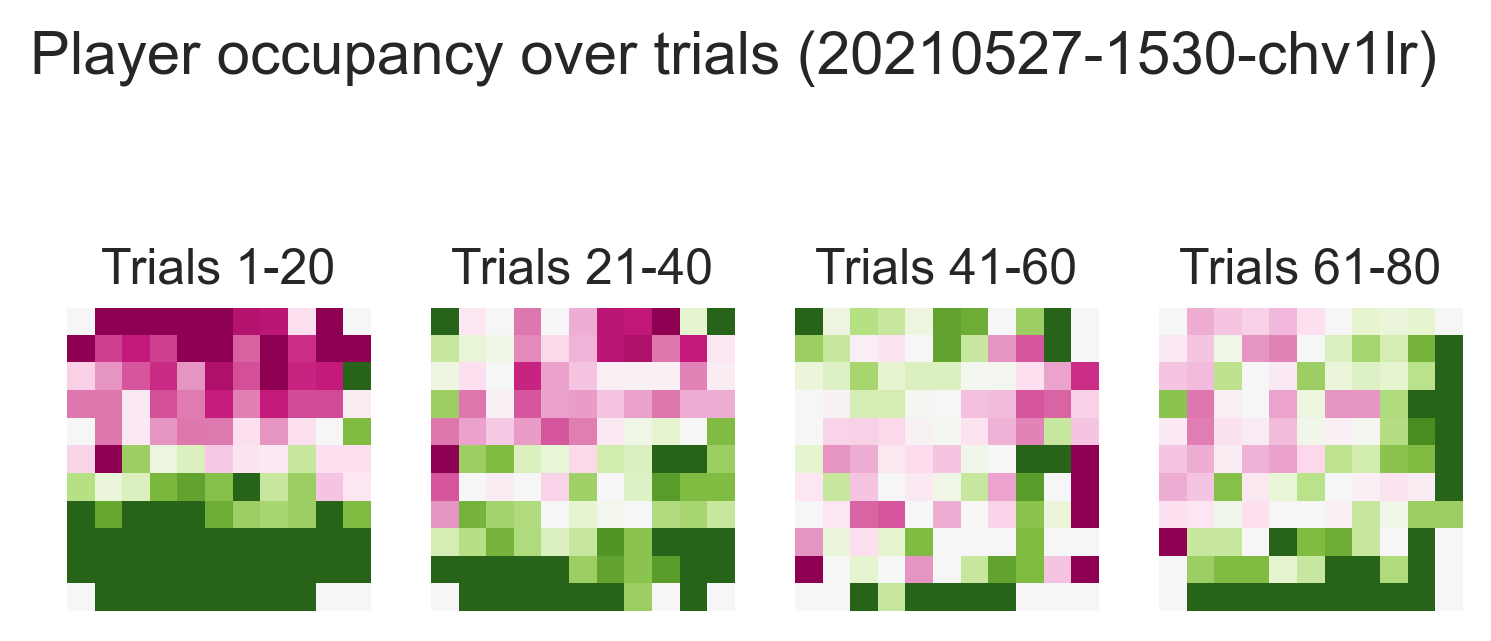

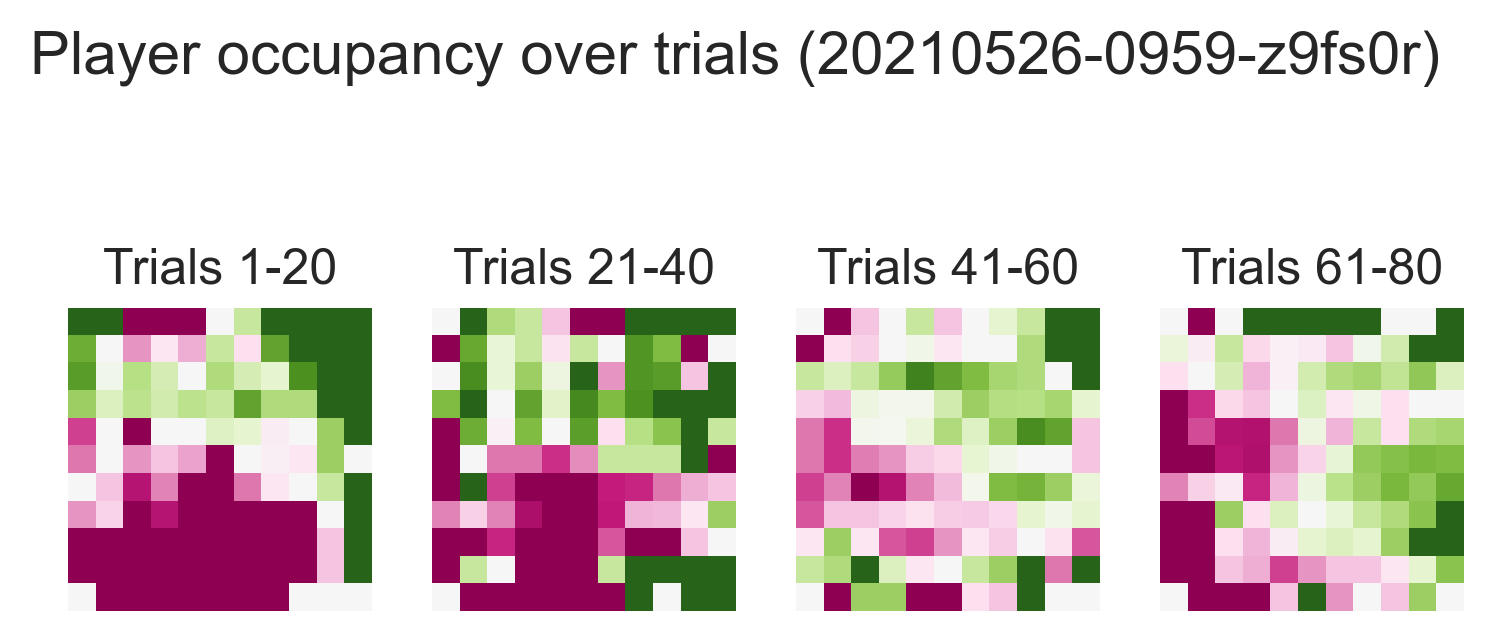

In [5]:
exps = df_trials.match_id.unique()
for exp in exps:
    plots.render_color_distr_across_maps(exp)

### Color and goal balance across trials

#### The three dyads that figured out the task eventually converged on a color convention, some faster than others. 

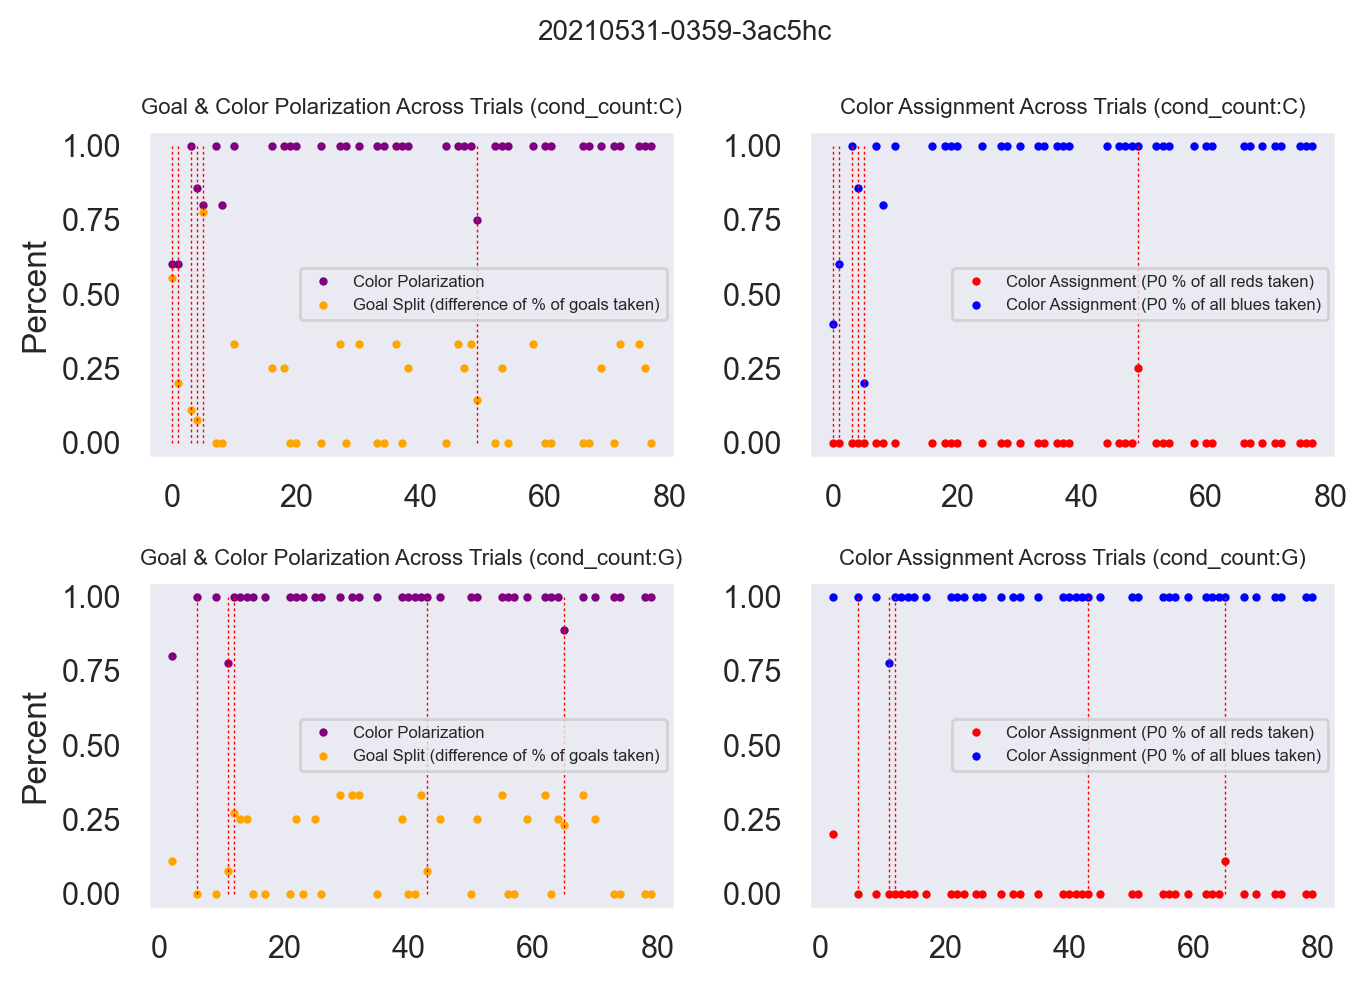

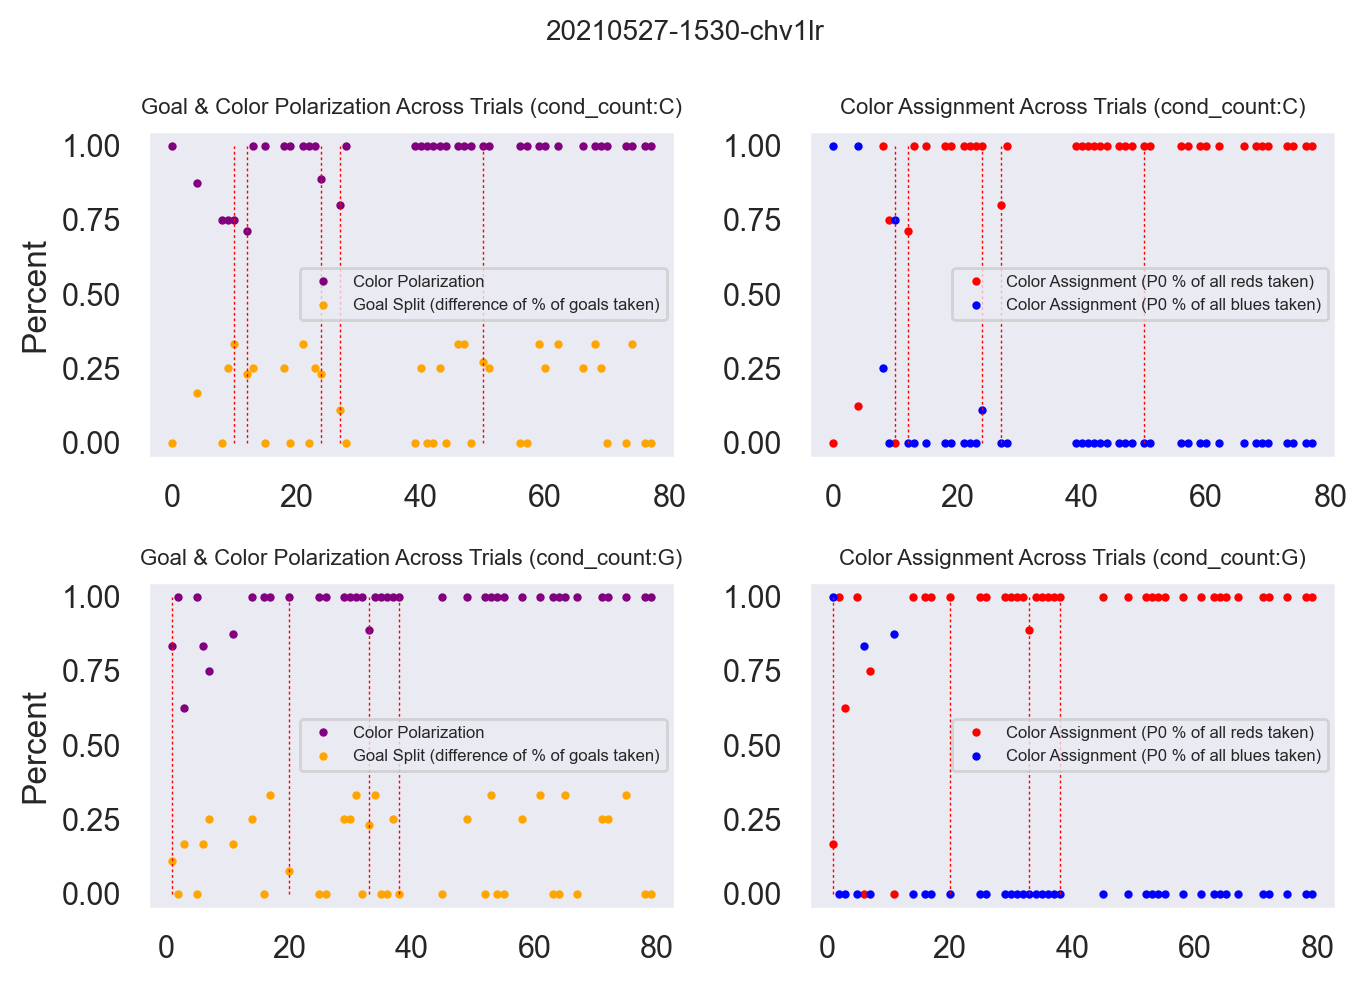

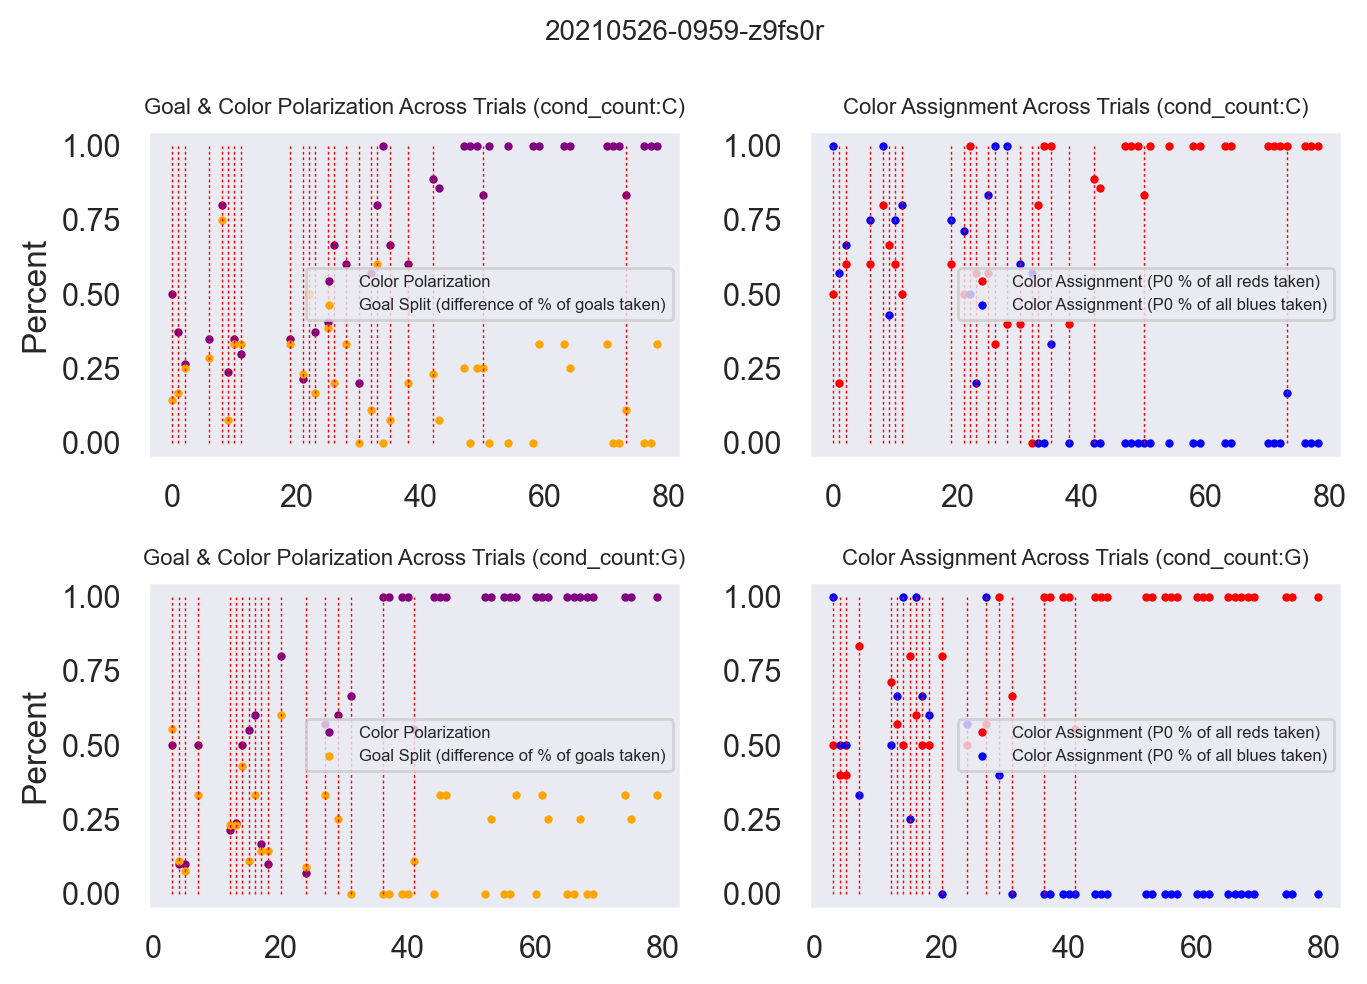

In [9]:
for match_id in df_trials.match_id.unique():
    df_match = analysis_helper.match_trials(df_trials, match_id)
    plots.match_timeseries(df_match, split_row_attr='cond_count', split_row_values=['C', 'G'])

In [7]:
# for match_id in df_trials.match_id.unique():
#     df_match = analysis_helper.match_trials(df_trials, match_id)
#     plots.move_time_correlations(df_match, match_id)

### Spatial preferences visualized as average angle across trials

In most dyads, periods of consistent differentiated angles can be seen (as ~flat green and pink points with large offset across a range of trials).

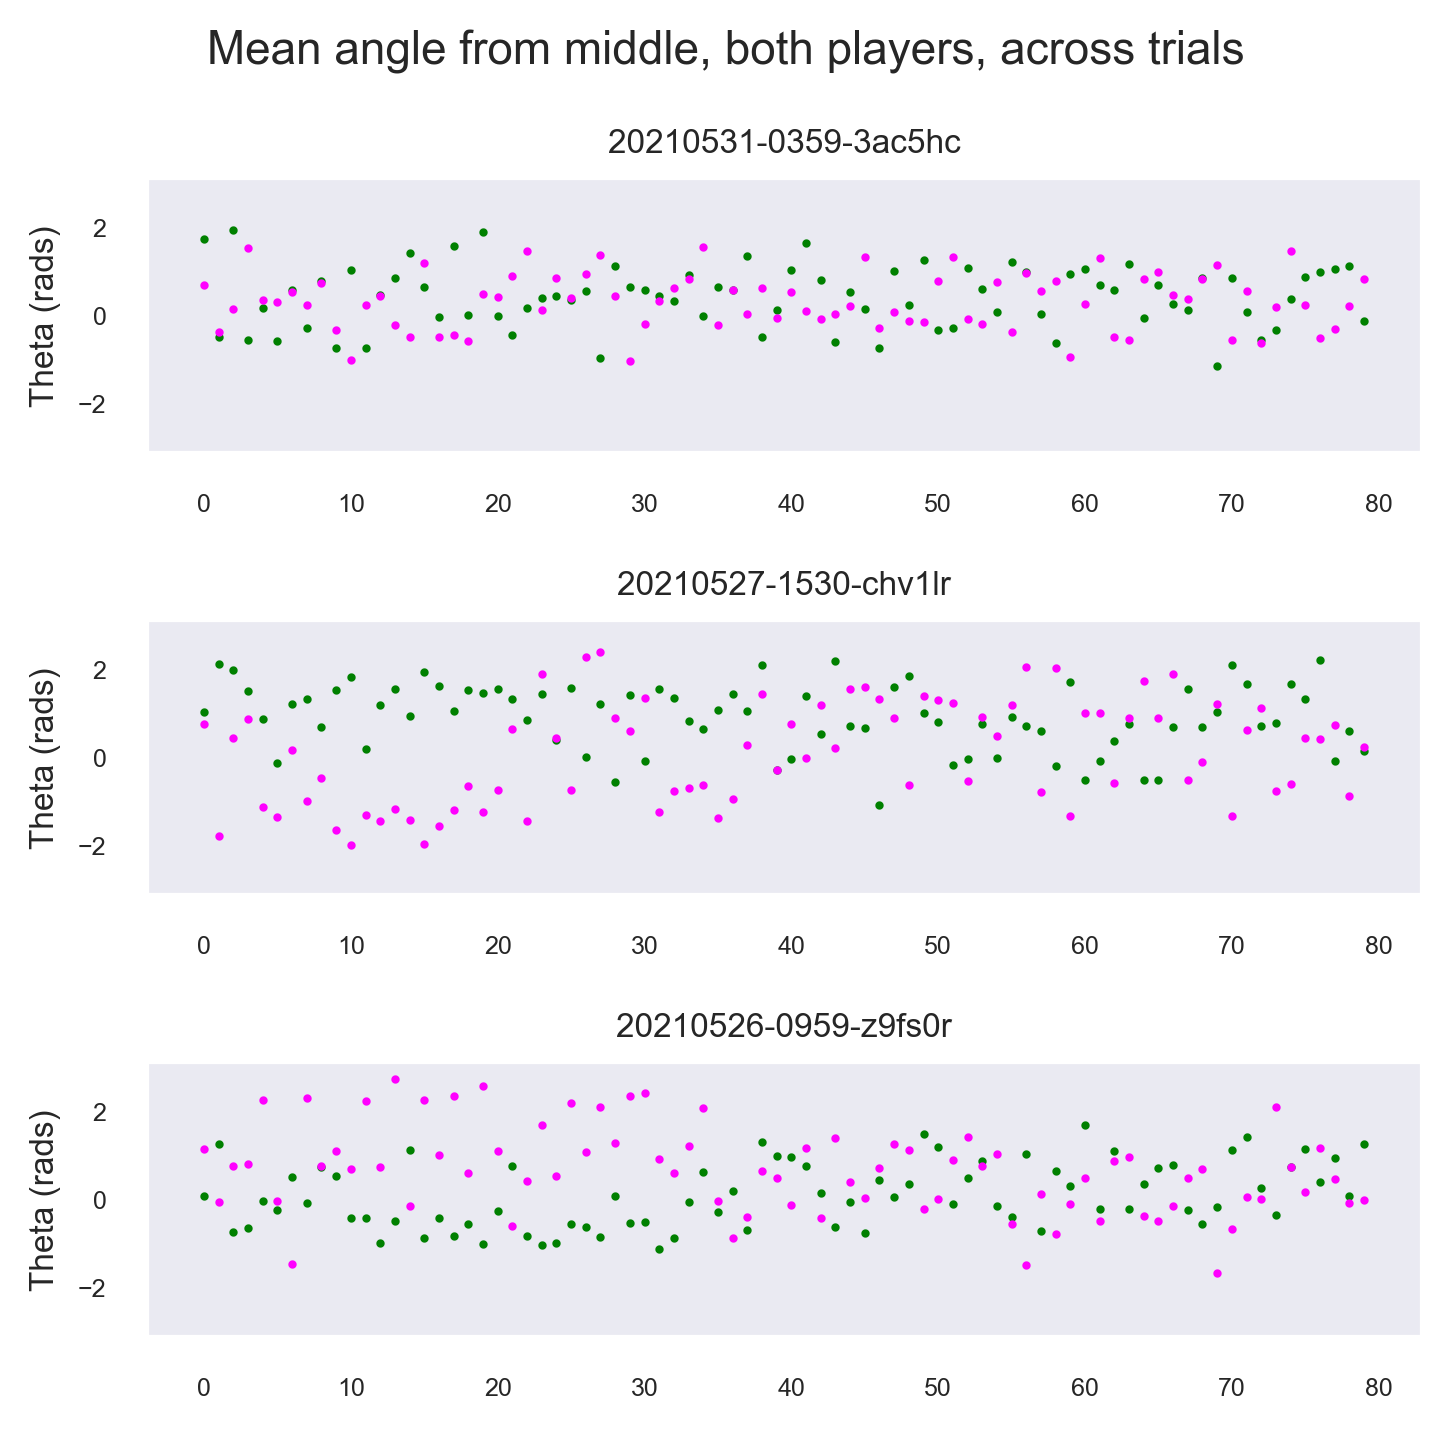

In [8]:
plots.scatter_angle_over_trials(df_trials)

### P2P distance effects (across each trial)

In [9]:
df_distance = analysis_helper.build_distance_df(df_trials)

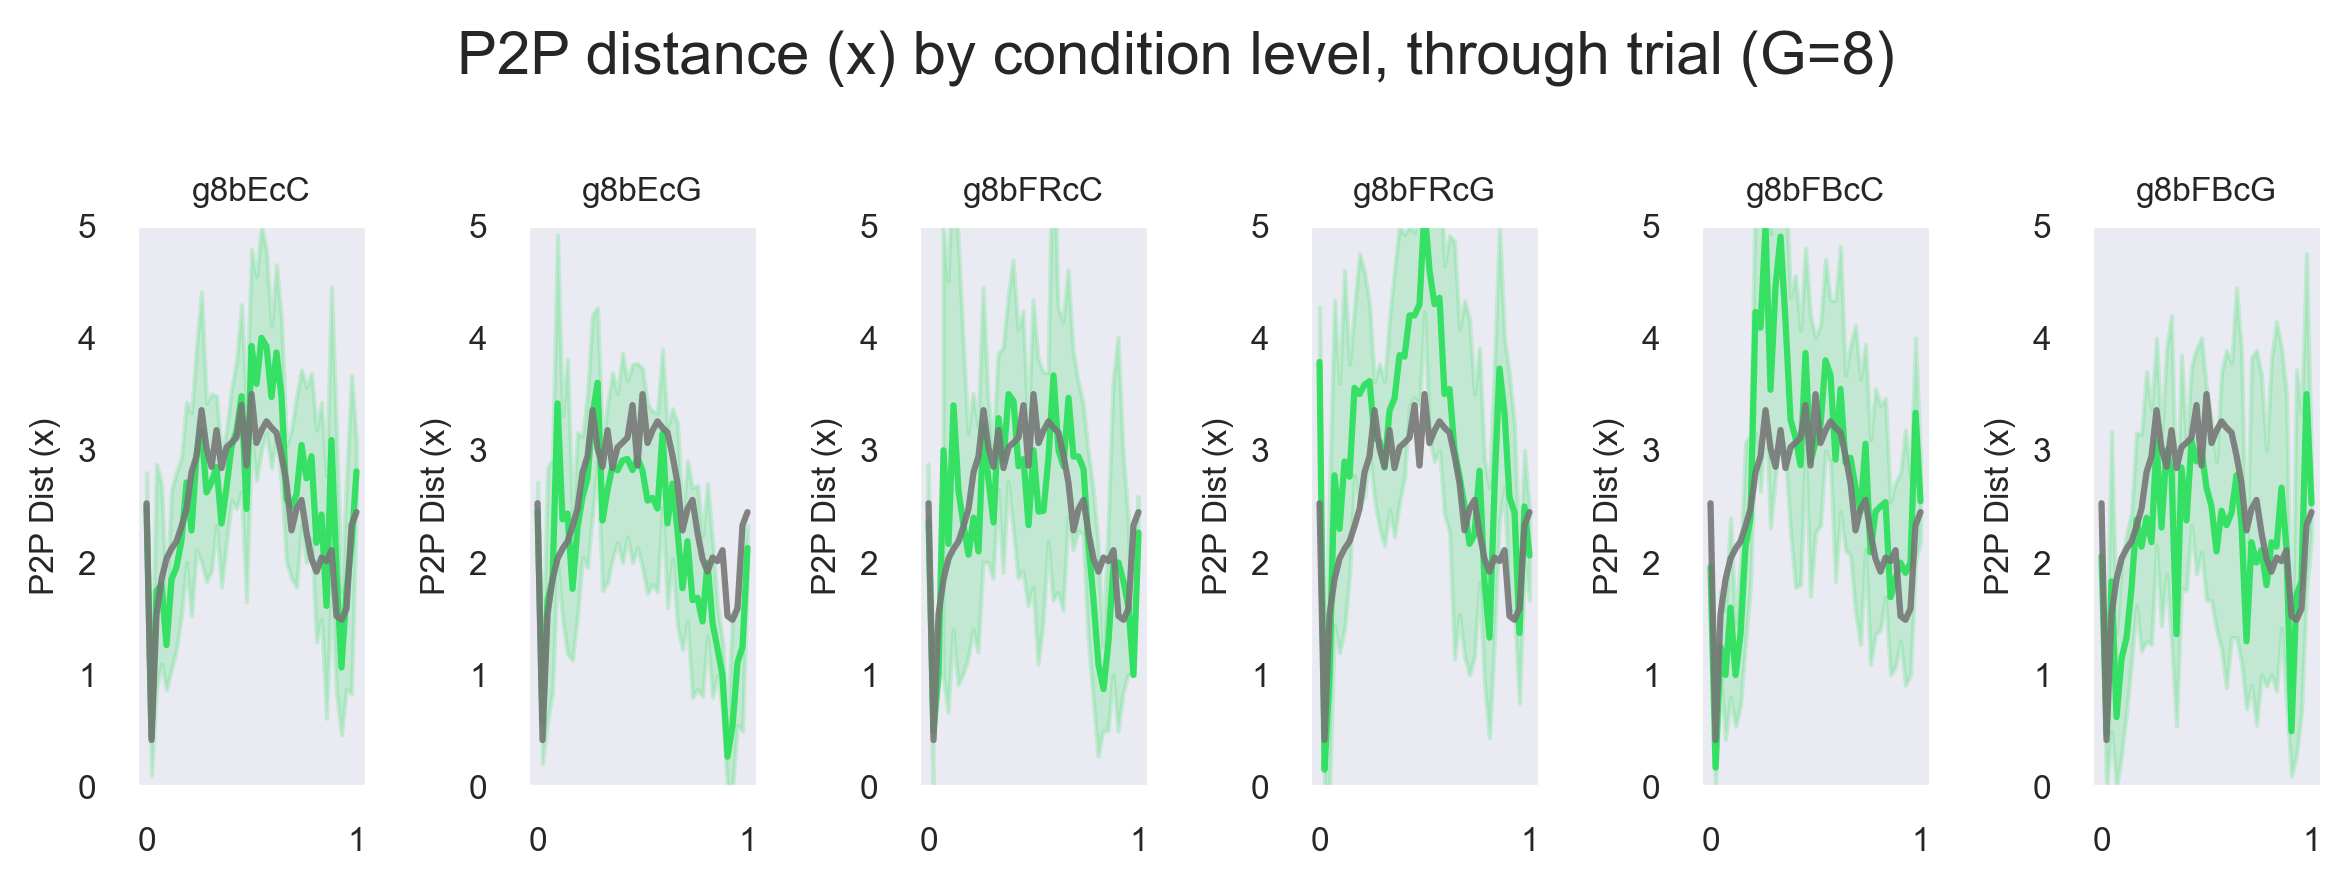

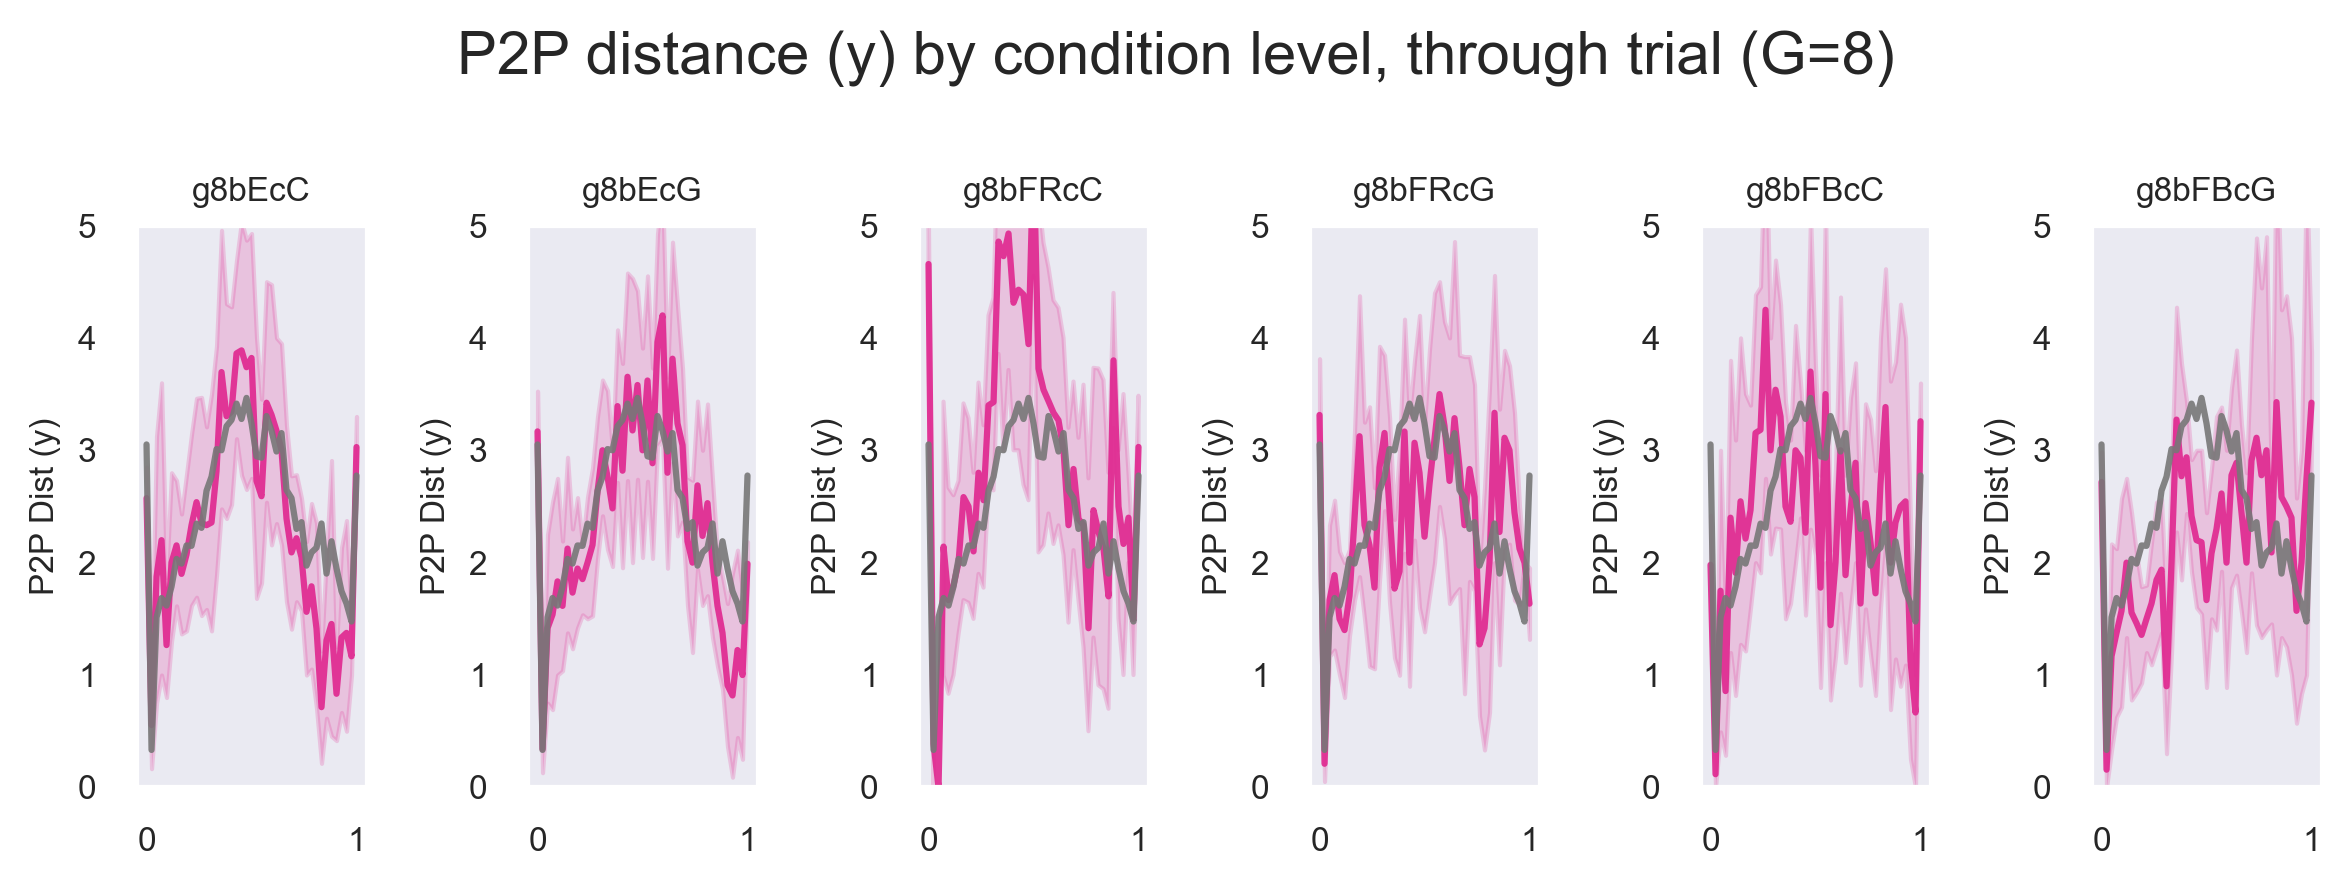

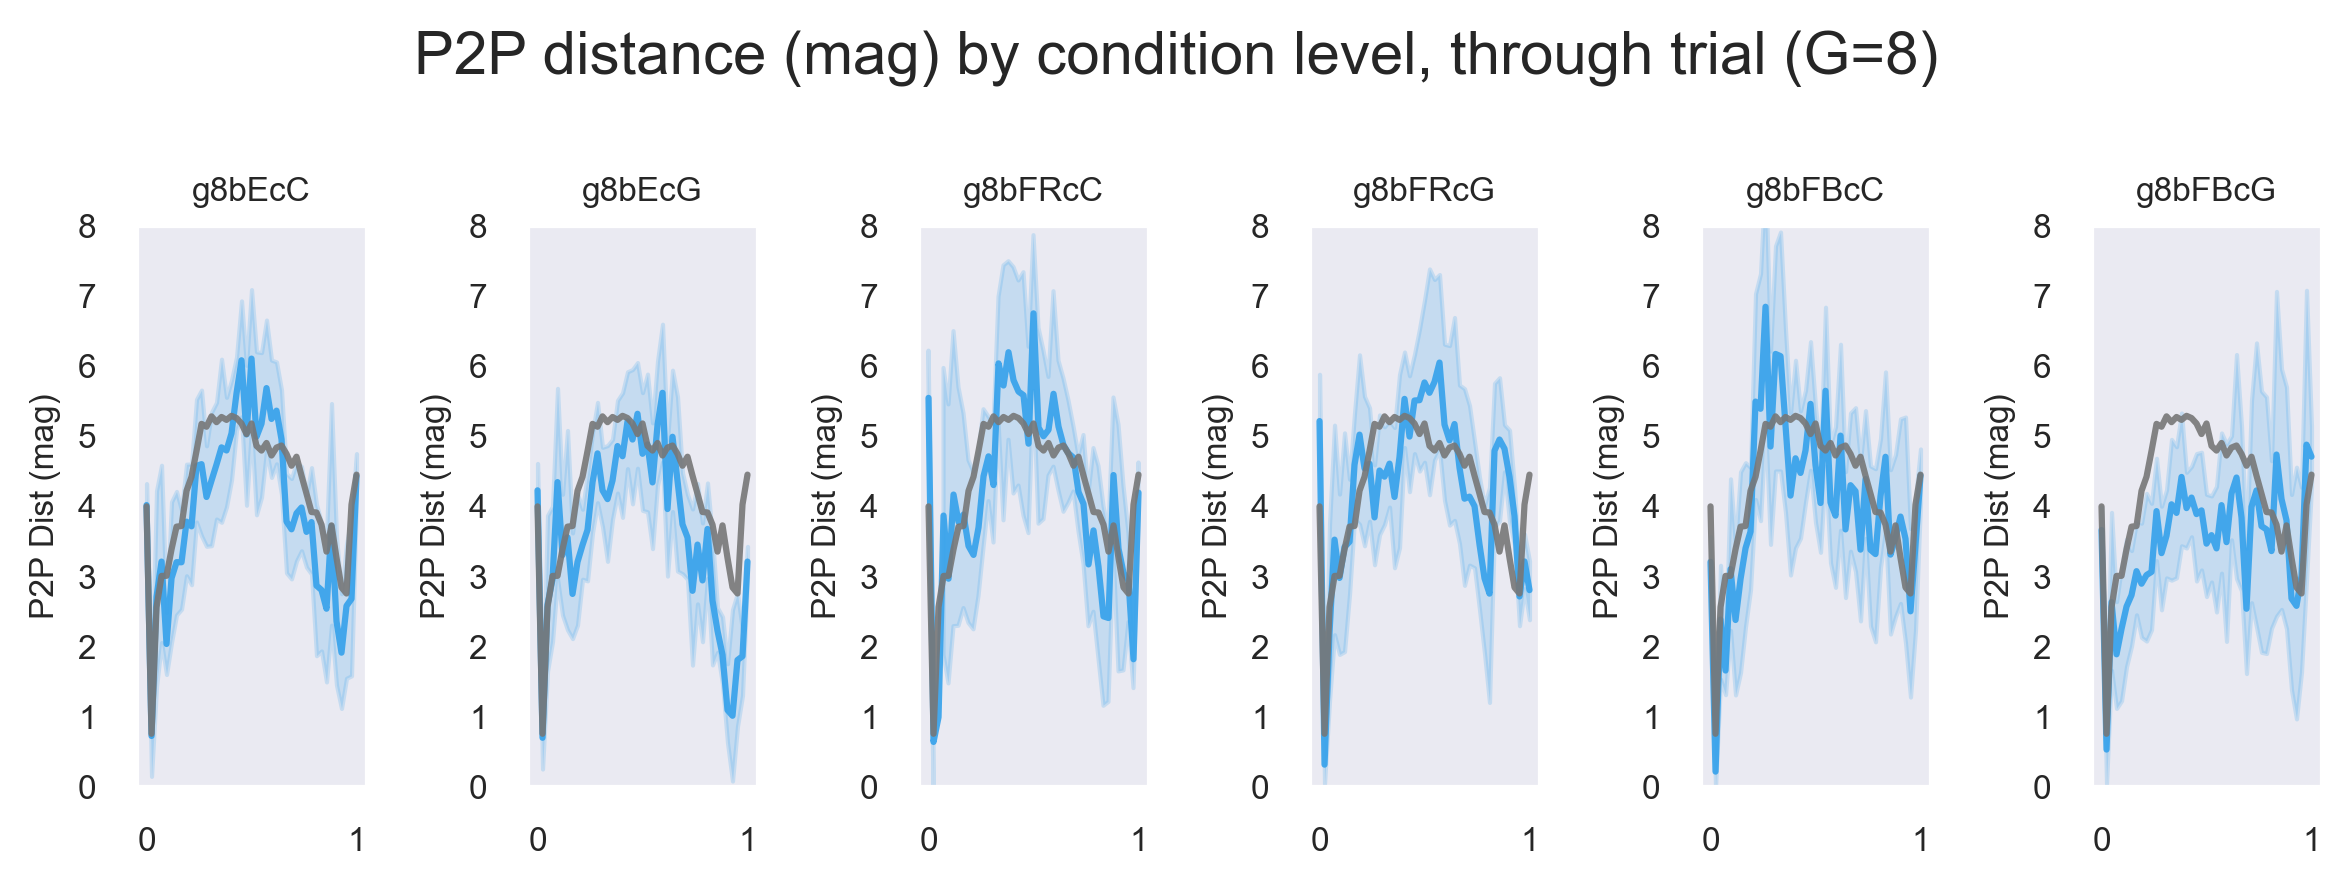

In [10]:
plots.p2p_dist_plot(df_distance, kind='x')
plots.p2p_dist_plot(df_distance, kind='y')
plots.p2p_dist_plot(df_distance, kind='mag')

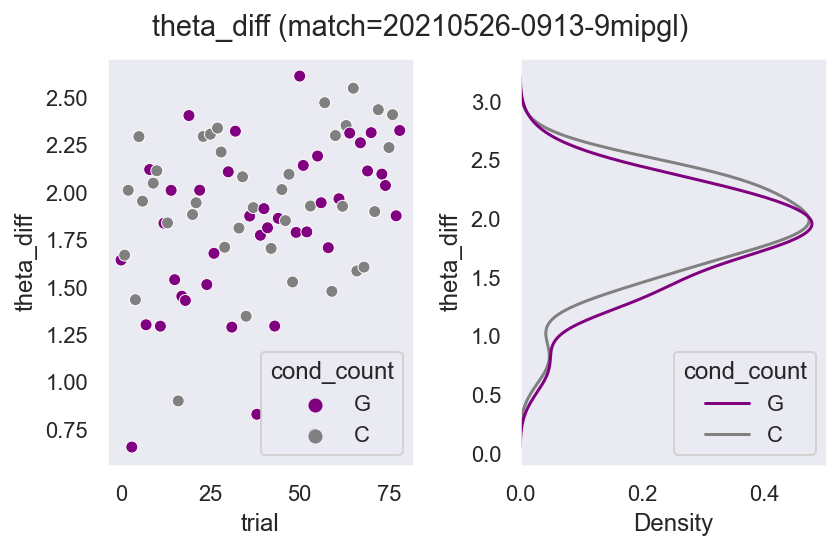

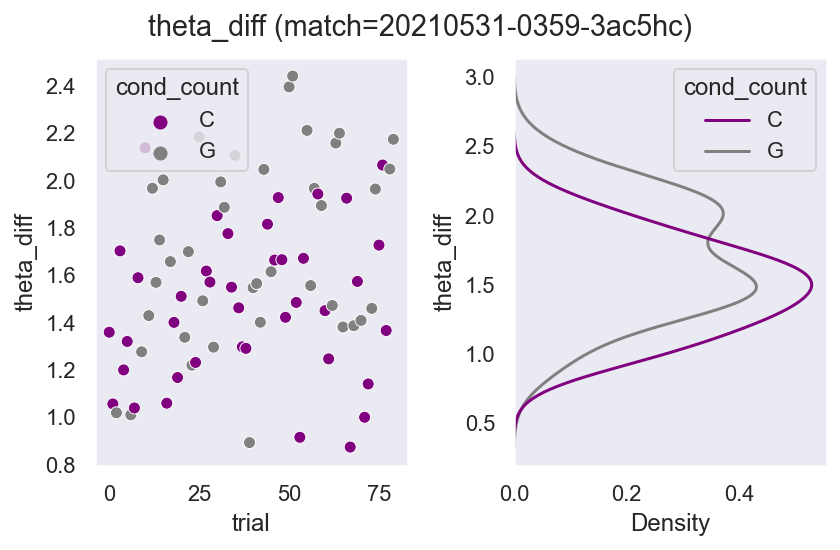

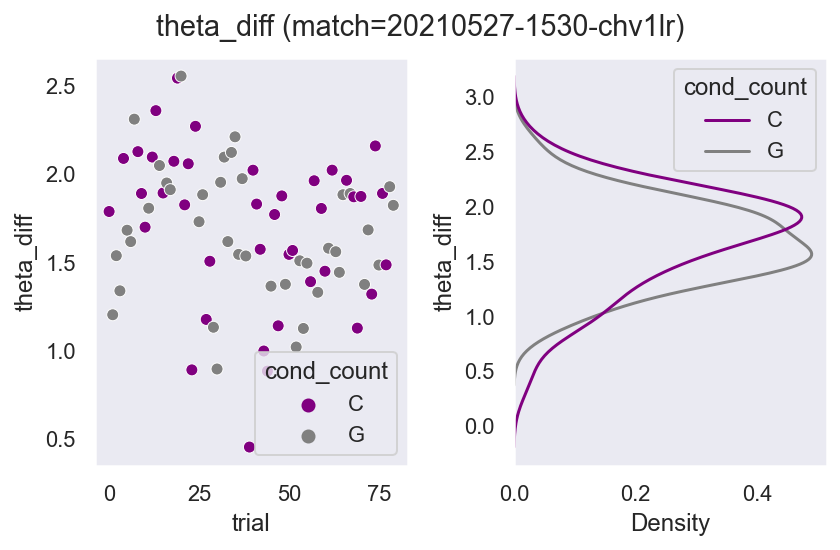

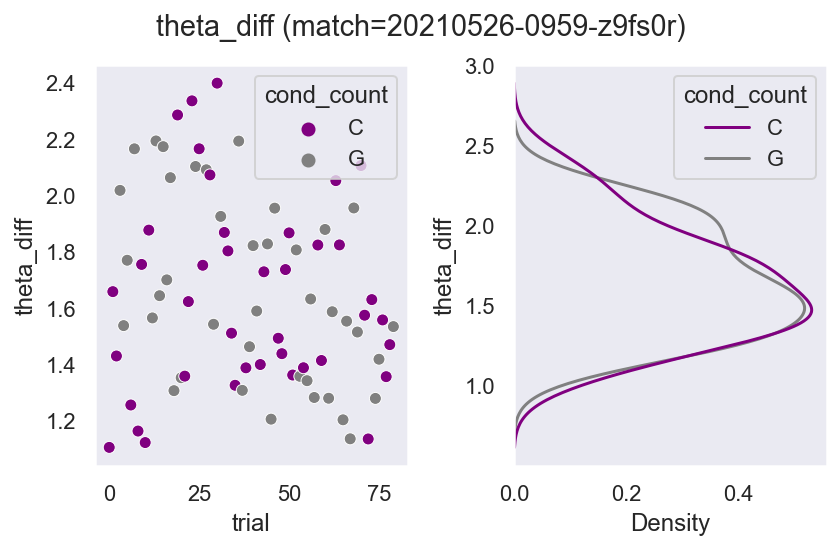

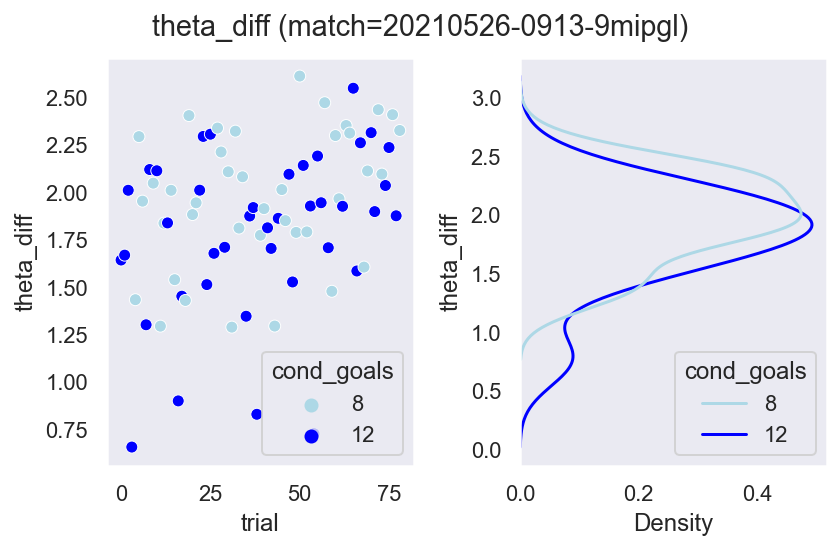

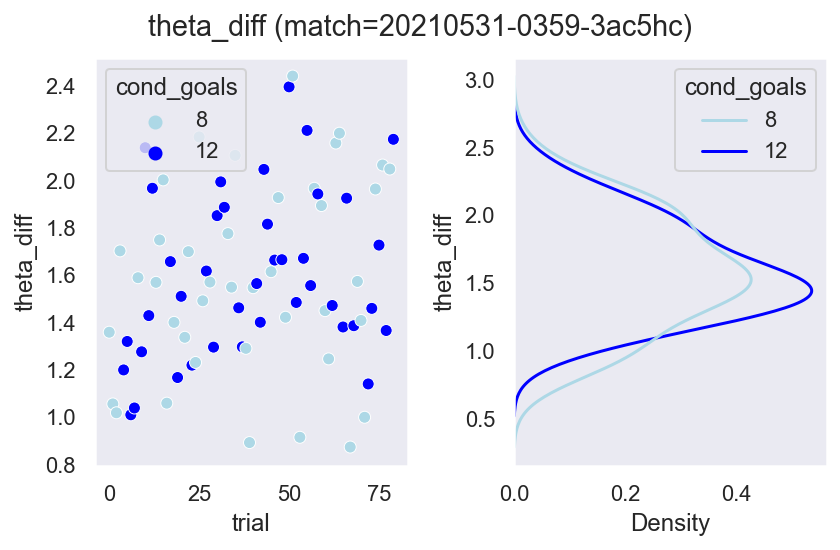

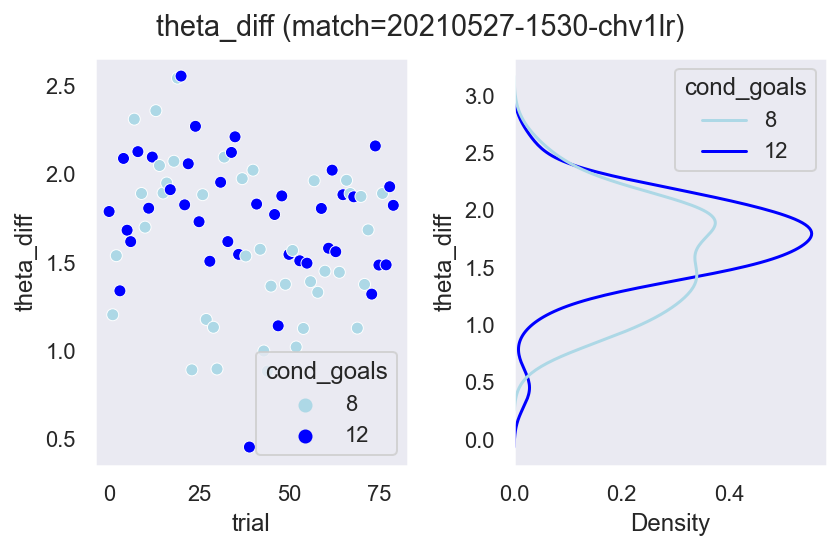

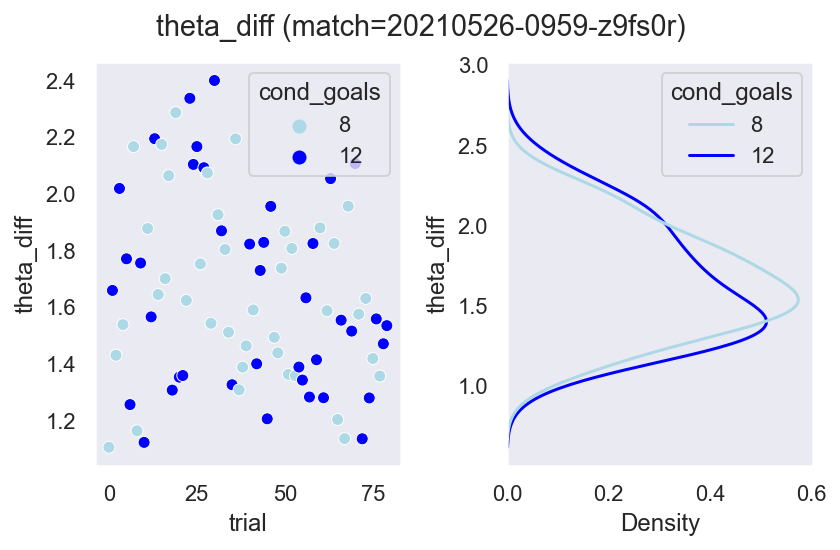

In [17]:
dist_metric = 'theta_diff'  # 'mean_dist'
for cond in ['cond_count', 'cond_goals']:
    CLR = ['purple', 'gray'] if cond == 'cond_count' else ['lightblue', 'blue']
    for mid in df_trials.match_id.unique():
        fig, axs = plt.subplots(1, 2, dpi=144)
        df_match = df_trials[df_trials.match_id == mid]
        sns.scatterplot(data=df_match, x='trial', hue=cond, y=dist_metric, palette=CLR, ax=axs[0])
        sns.kdeplot(data=df_match, hue=cond, y=dist_metric, palette=CLR, ax=axs[1])
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.suptitle("%s (match=%s)" % (dist_metric, mid))
        plt.show()

## Main effects

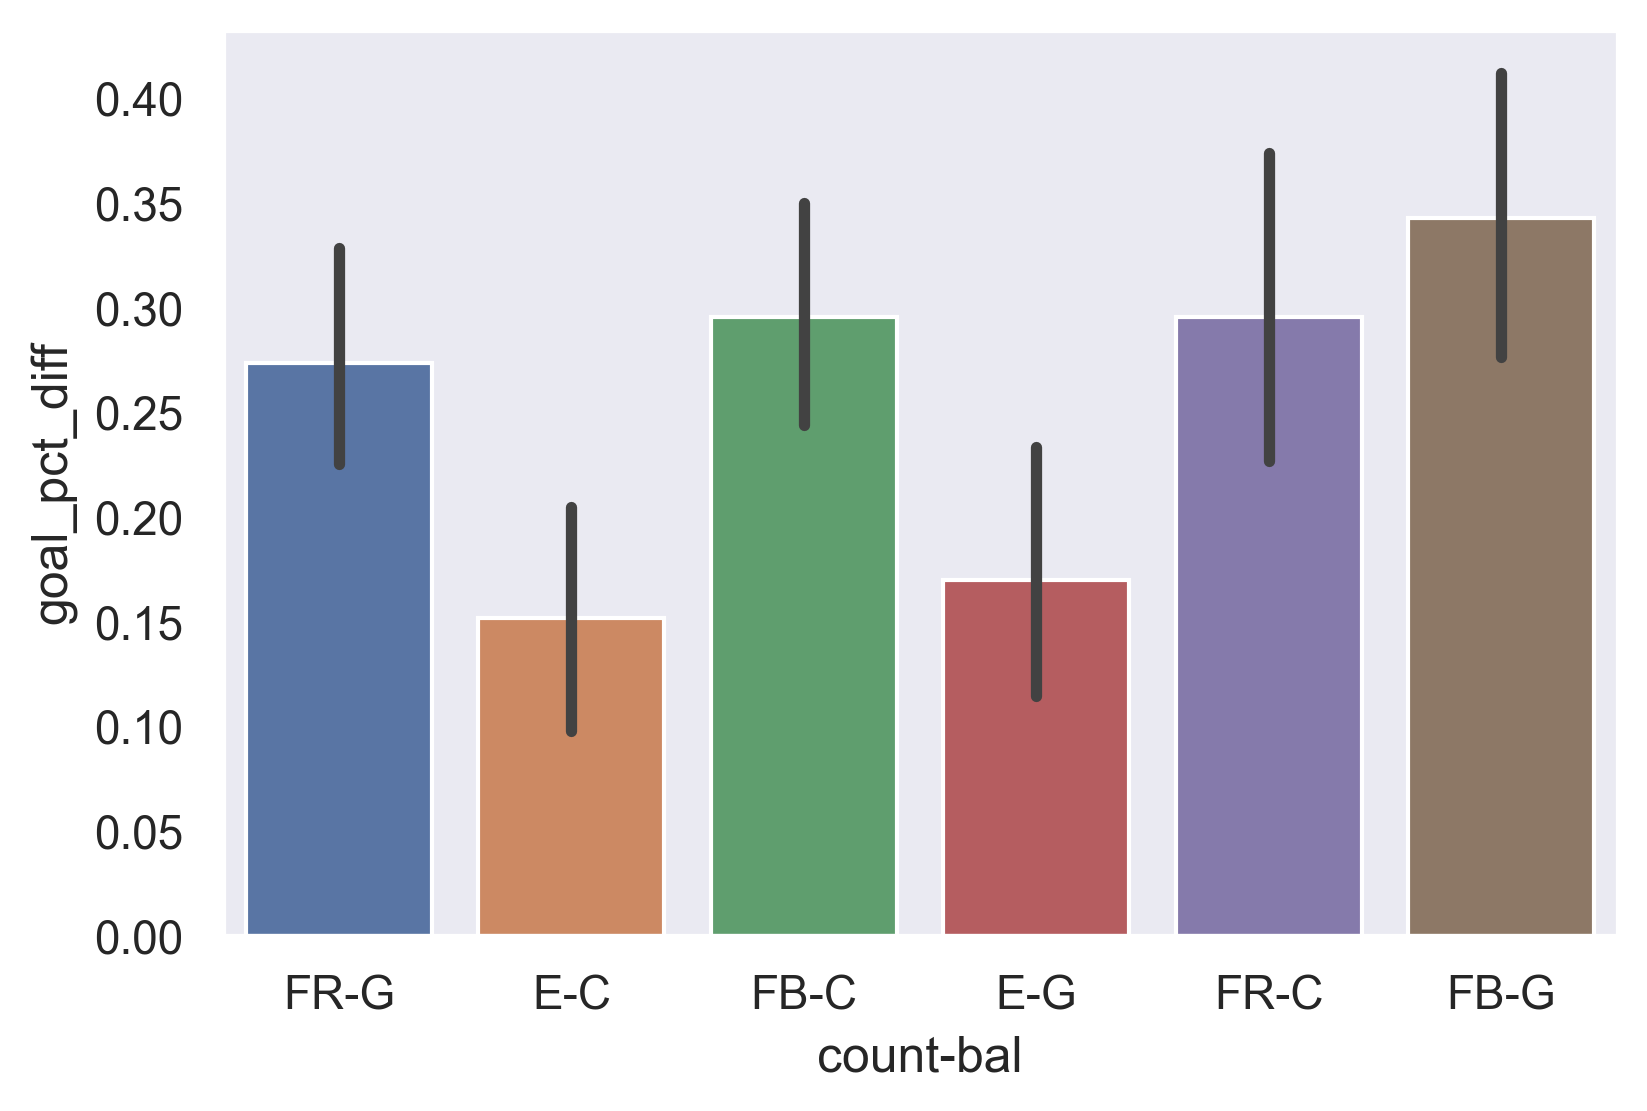

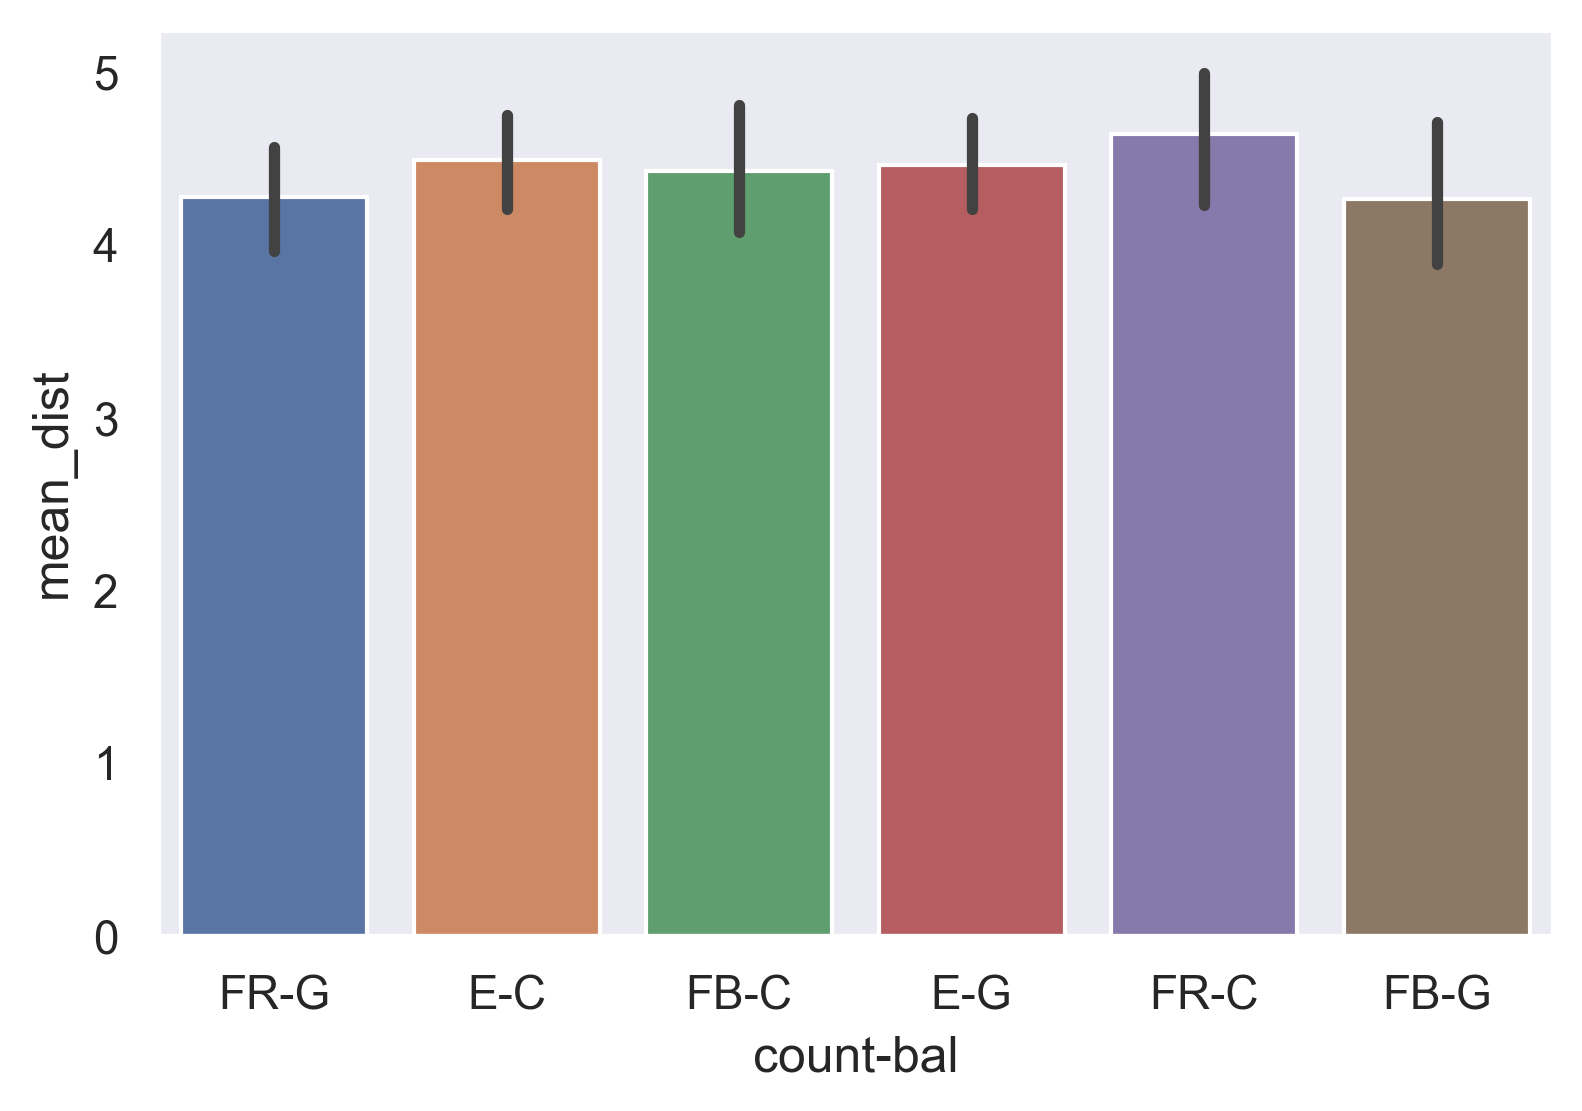

In [16]:
df_trials['count-bal'] = df_trials['cond_bal'] + "-" + df_trials['cond_count']
sns.barplot(data=df_trials, x='count-bal', y='goal_pct_diff')
plt.show()

sns.barplot(data=df_trials, x='count-bal', y='mean_dist')
plt.show()

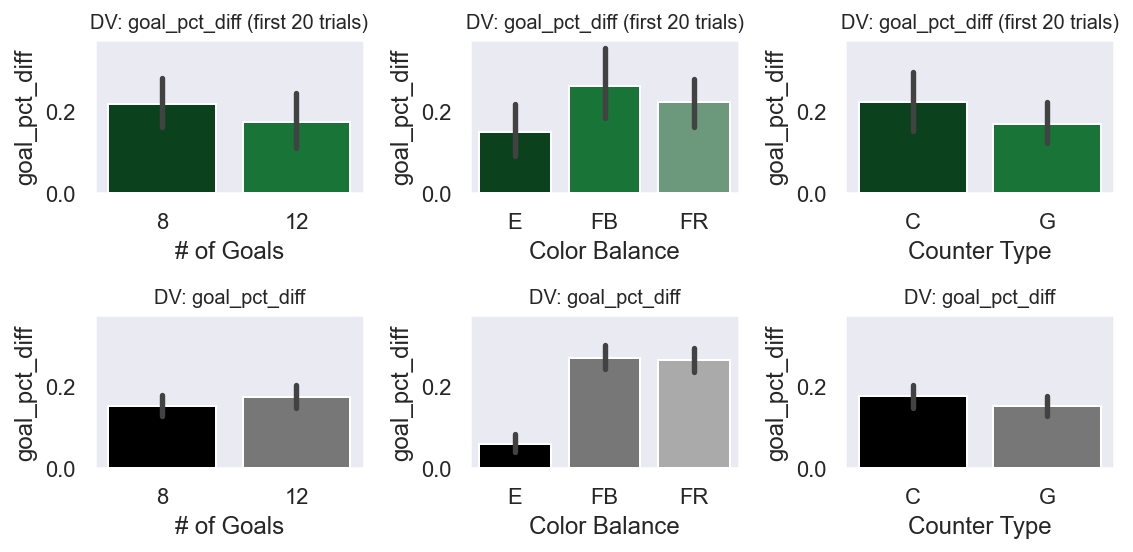

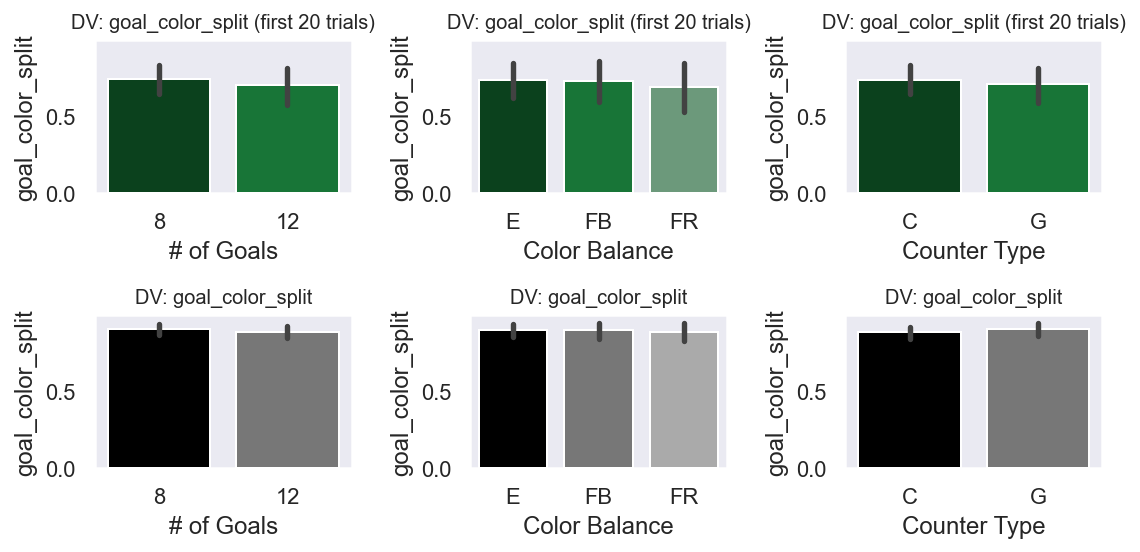

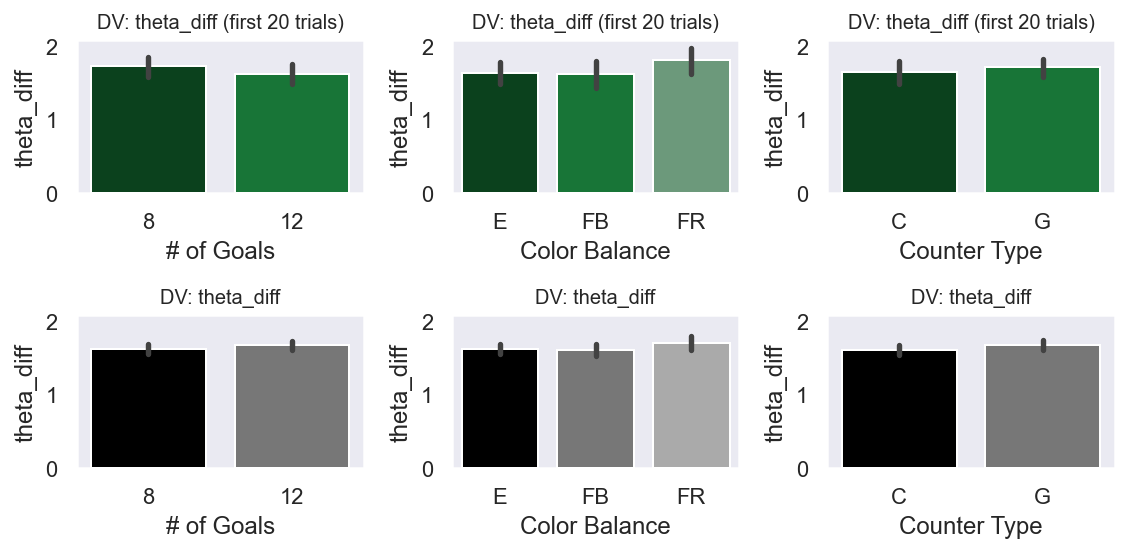

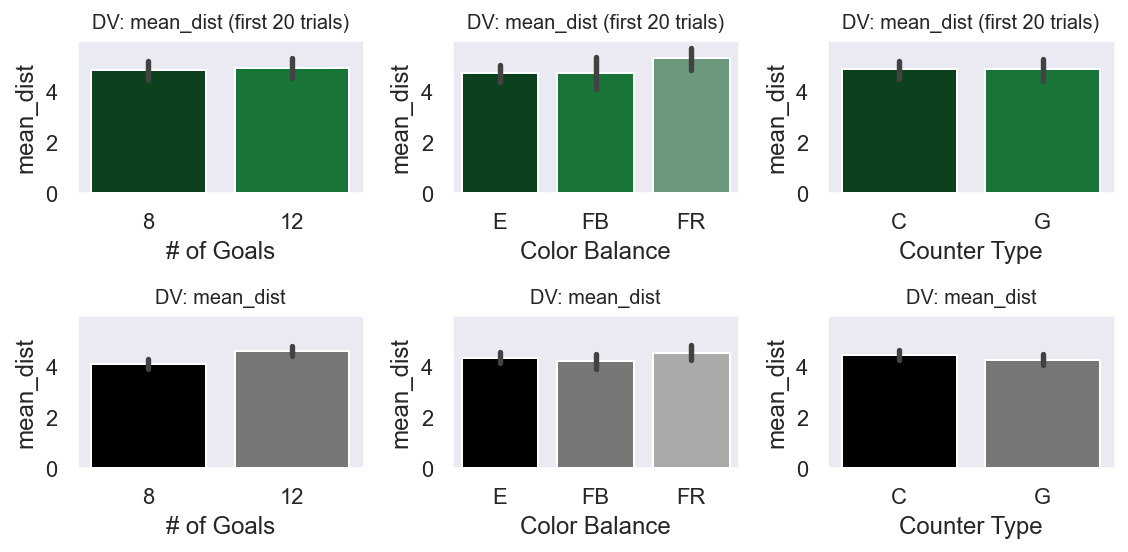

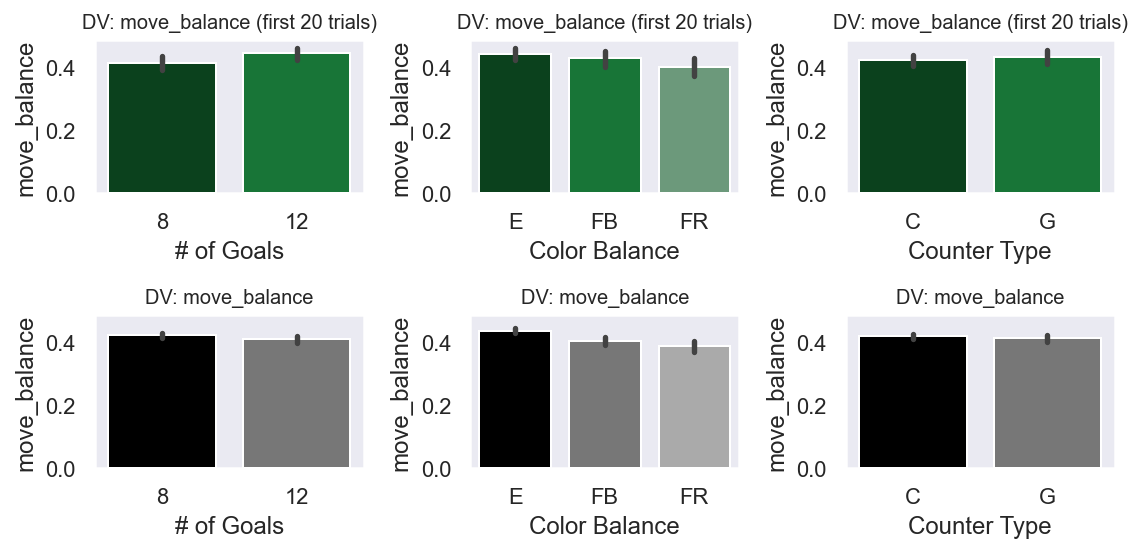

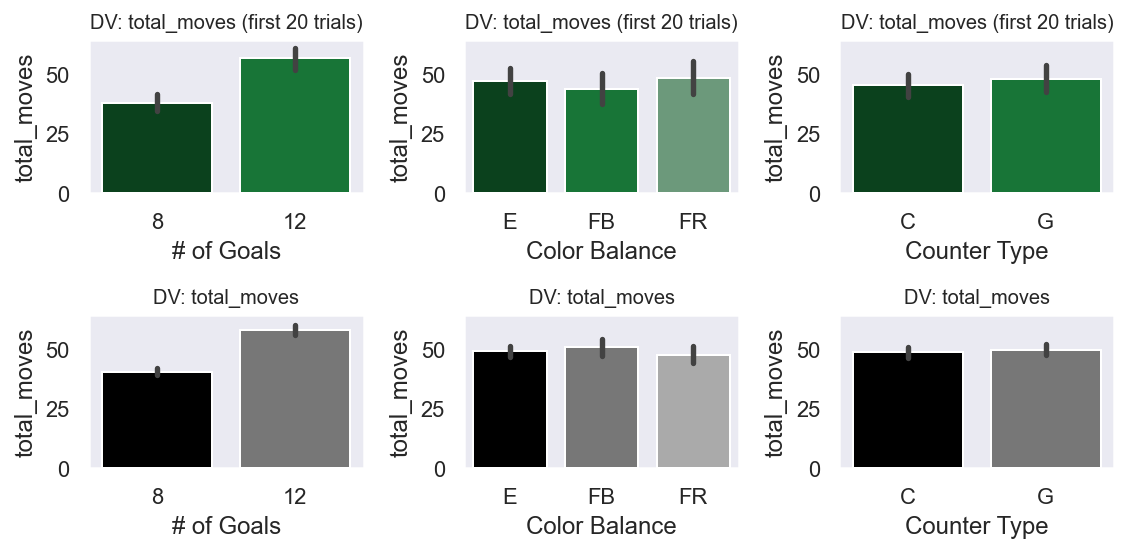

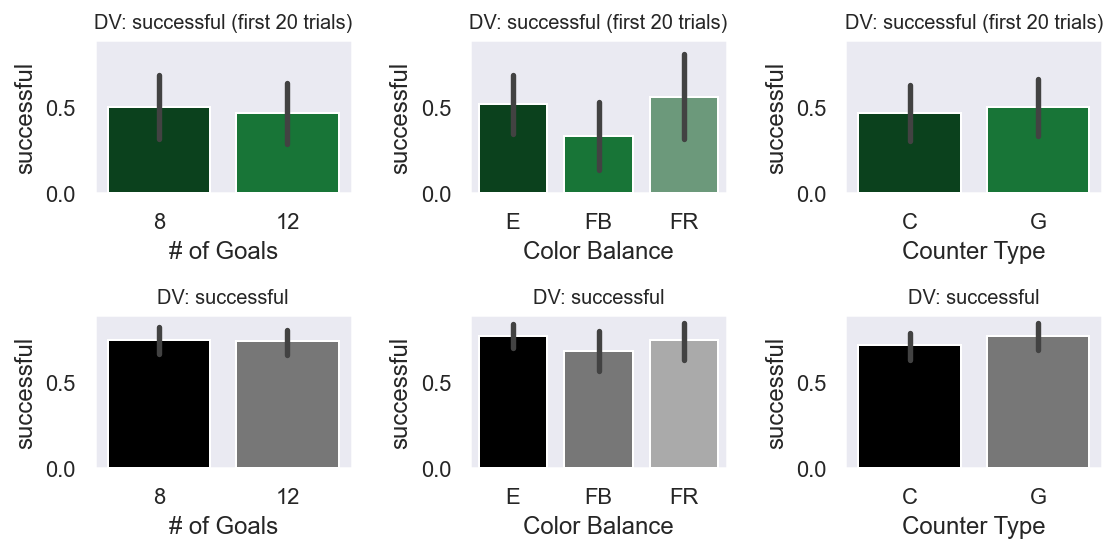

In [11]:
for dv in ['goal_pct_diff', 'goal_color_split', 'theta_diff', 'mean_dist', 'move_balance', 'total_moves', 'successful']:
    plots.plot_main_effect(df_trials, dv)

In [18]:
# Save augmented dataframes
df_trials.to_pickle('./frames/df_trials_v2_plus.pickle')
df_trials.to_csv('./frames/df_trials_v2_plus.csv')